<a href="https://colab.research.google.com/github/samtrrs52/Valores_Atipicos/blob/main/3_Valores_at%C3%ADpicos_Columnas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Librerías y Archivo**

In [83]:
#Importamos las librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

El archivo que se está usando en esta etapa, es un archivo pre-procesado que está libre de datos nulos. El método varió dependiendo de la columna y el archivo html debería de estar dentro del repositorio.

** En el procedimiento anterior igualmente se eliminó la columna de "indice_tiempo" para trabajar solamente con columnas flotantes

In [85]:
#Carga desde un archivo .xlsx sin indice
data = pd.read_csv('DataFinal.csv')
data = data.iloc[:,2:]
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ventas_precios_corrientes            65 non-null     float64
 1   ventas_precios_constantes            65 non-null     float64
 2   ventas_totales_canal_venta           65 non-null     float64
 3   salon_ventas                         65 non-null     float64
 4   canales_on_line                      65 non-null     float64
 5   ventas_totales_medio_pago            65 non-null     float64
 6   efectivo                             65 non-null     float64
 7   tarjetas_debito                      65 non-null     float64
 8   tarjetas_credito                     65 non-null     float64
 9   otros_medios                         65 non-null     float64
 10  ventas_totales_grupo_articulos       65 non-null     float64
 11  subtotal_ventas_alimentos_bebidas 

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,9047205.493,1716991.073,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,8309150.301,1527488.518,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1026166.544,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,8845010.494,1782030.557,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1075525.842,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277


^ utilizamos ".info()" para verificar que en efecto no contemos con datos nulos y que solamente contamos con las variables numéricas.

#**Método de desviación estándar**

In [86]:
# Creamos un DF con límites inferiores y superiores
resultados = pd.DataFrame(columns=['Superior', 'Inferior'], index=data.columns)
for columna in data:
  LimiteUpper = data[columna].mean() + 3*data[columna].std()
  LimiteLower = data[columna].mean() - 3*data[columna].std()
  resultados.loc[columna] = [LimiteUpper, LimiteLower]

# Aquí creamos una copia del df inicial y creamos un bucle que busque por columna e hilera, cruzándolo con el DF de los resultados. A esta nueva copia solo se le añaden las columnas que no tienen outliers.
data_clean = data.copy()
for columna in data_clean:
  data_clean = data_clean[(data_clean[columna] < resultados.loc[columna]['Superior']) & (data_clean[columna] > resultados.loc[columna]['Inferior'])]

# -----------------------------------

# Esto es solamente para *saber* qué columnas tienen outliers, pero el DF ya se limpió previamente.

# Creamos un diccionario vacío y un ciclo for que busque las columnas
outliers_por_columna = {}
for columna in data:
  outliers = data[(data[columna] >= resultados.loc[columna]['Superior']) | (data[columna] <= resultados.loc[columna]['Inferior'])]
  if not outliers.empty: # con este condicional solo añadimos las columnas con outliers
    outliers_por_columna[columna] = outliers

# Imprimimos las llaves del diccionario, que solo contiene las columnas con outliers y los outliers mismos
print("Columnas con outliers:")
for identificadas in outliers_por_columna.keys():
  print(identificadas)

Columnas con outliers:
ventas_precios_constantes
bebidas
indumentaria_calzado_textiles_hogar
otros


In [87]:
# Automáticamente se genera un DF por cada columna. Para visualizar los outliers, solo se tiene que imprimir el nombre del diccionaro y la columna de interés.
outliers_por_columna["ventas_precios_constantes"]

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,29569224.40,4492515.904,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
60,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,46962602.22,46053650.13,54048333.12,7452508.718,...,37505172.62,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,21330213.29,3782646.219,1.218755e+07,1.343307e+07


###Revisamos diferencias con bloxplots:

Imagen 1:original

Imagen 2:data limpia

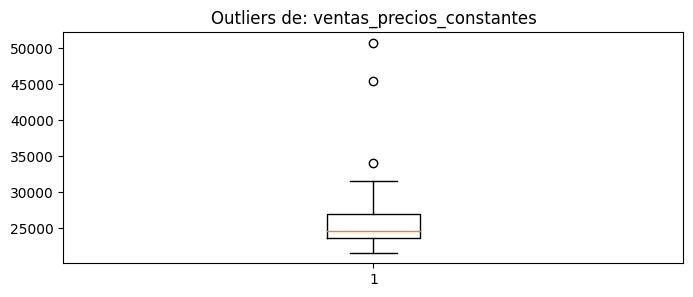

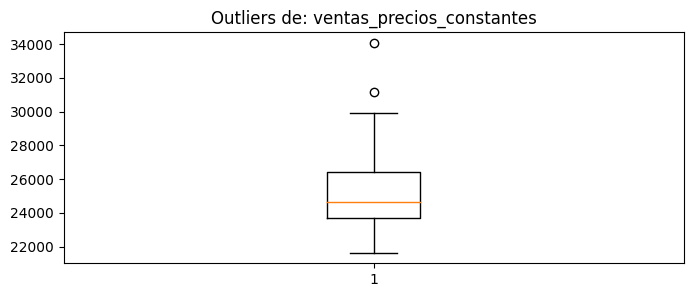

In [88]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["ventas_precios_constantes"]) 
plt.title("Outliers de: ventas_precios_constantes")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean["ventas_precios_constantes"]) 
plt.title("Outliers de: ventas_precios_constantes")
plt.show()

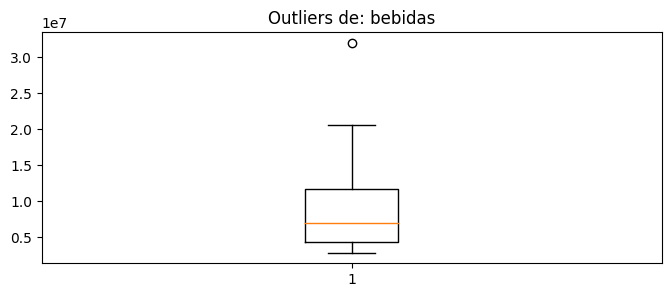

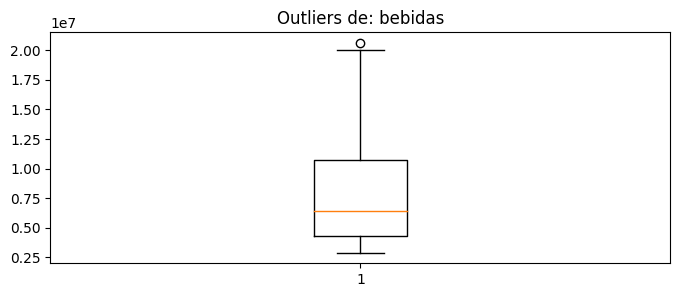

In [89]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["bebidas"]) 
plt.title("Outliers de: bebidas")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean["bebidas"]) 
plt.title("Outliers de: bebidas")
plt.show()

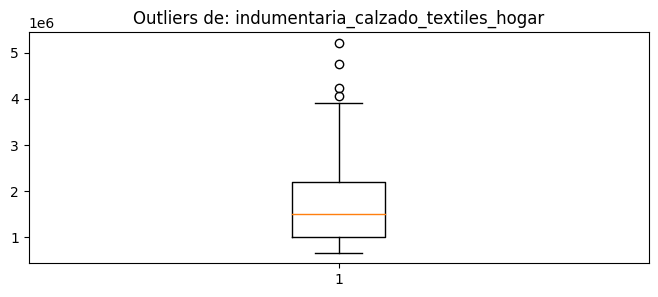

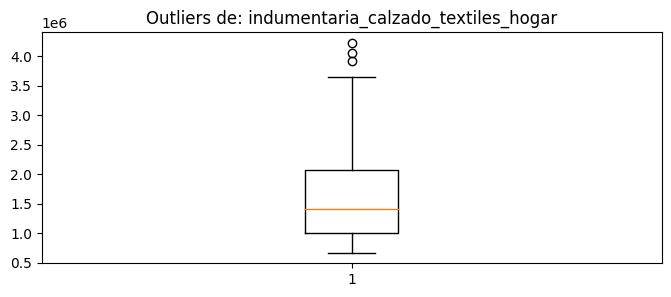

In [90]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de: indumentaria_calzado_textiles_hogar")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de: indumentaria_calzado_textiles_hogar")
plt.show()

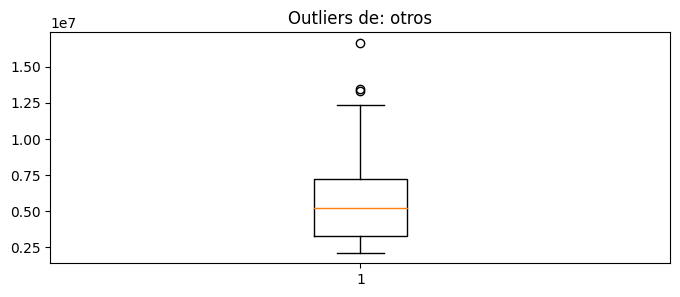

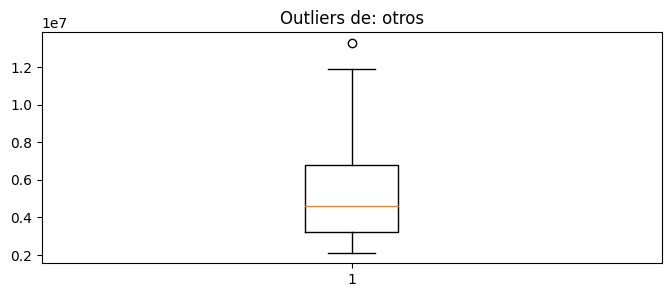

In [91]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["otros"]) 
plt.title("Outliers de: otros")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean["otros"]) 
plt.title("Outliers de: otros")
plt.show()

#**MÉTODO DE IQR (RANGO INTER QUARTILICO)**

Exactamente el mismo procedimiento que en el anterior, pero ahora calculando los límites con los cuartiles 1 y 3

In [92]:
# Cálculo de límites y limpieza de DF
resultados_iqr = pd.DataFrame(columns=['Superior', 'Inferior'], index=data.columns)
for columna in data:
  percentile25 = data[columna].quantile(0.25) #Q1
  percentile75 = data[columna].quantile(0.75) #Q3
  iqr = percentile75 - percentile25
  LimiteUpper_iqr = percentile75 + 1.5*iqr
  LimiteLower_iqr = percentile25 - 1.5*iqr
  resultados_iqr.loc[columna] = [LimiteUpper_iqr, LimiteLower_iqr]
data_clean_iqr = data.copy()
for columna in data_clean_iqr:
  data_clean_iqr = data_clean_iqr[(data_clean_iqr[columna] <= resultados_iqr.loc[columna]['Superior']) & (data_clean_iqr[columna] >= resultados.loc[columna]['Inferior'])]

# Identificación de los outliers
outliers_por_columna_iqr = {}
for columna in data:
  outliers_iqr = data[(data[columna] >= resultados_iqr.loc[columna]['Superior']) | (data[columna] <= resultados_iqr.loc[columna]['Inferior'])]
  if not outliers_iqr.empty:
    outliers_por_columna_iqr[columna] = outliers_iqr
if outliers_por_columna_iqr:
  print("Columnas con outliers:")
  for columna in outliers_por_columna_iqr.keys():
    print(columna)

Columnas con outliers:
ventas_precios_corrientes
ventas_precios_constantes
tarjetas_debito
tarjetas_credito
bebidas
panaderia
lacteos
alimentos_preparados_rotiseria
indumentaria_calzado_textiles_hogar
electronicos_articulos_hogar
otros


In [93]:
# Automáticamente se genera un DF por cada columna. Para visualizar los outliers, solo se tiene que imprimir el nombre del diccionaro y la columna de interés.
outliers_por_columna_iqr["lacteos"]

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,68070088.23,8944251.942,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


###Revisamos diferencias con bloxplots:

Imagen 1:original

Imagen 2:data limpia

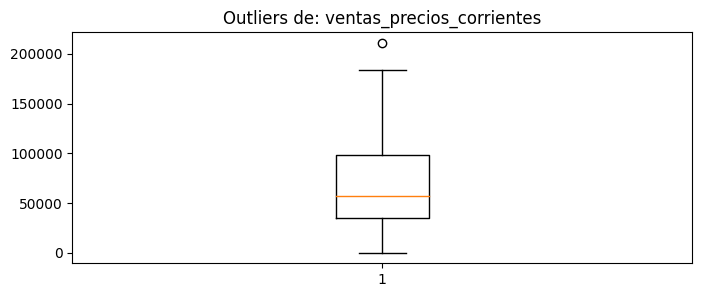

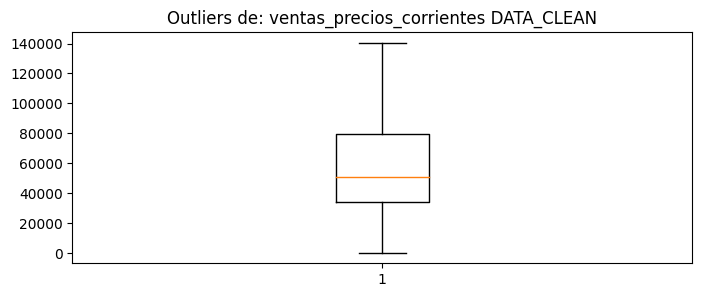

In [94]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["ventas_precios_corrientes"]) 
plt.title("Outliers de: ventas_precios_corrientes")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["ventas_precios_corrientes"]) 
plt.title("Outliers de: ventas_precios_corrientes DATA_CLEAN")
plt.show()

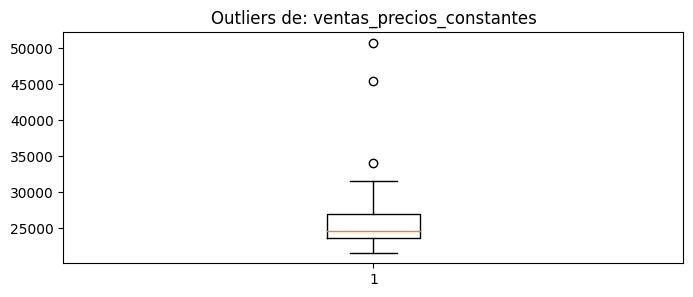

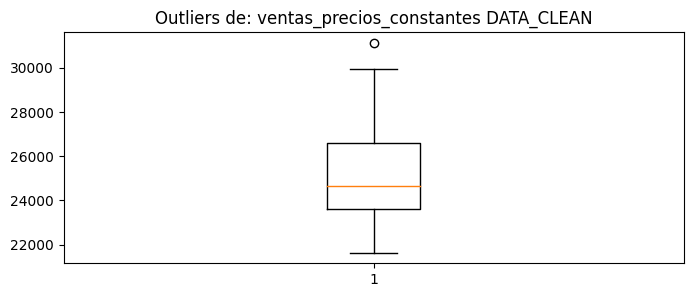

In [95]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["ventas_precios_constantes"]) 
plt.title("Outliers de: ventas_precios_constantes")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["ventas_precios_constantes"]) 
plt.title("Outliers de: ventas_precios_constantes DATA_CLEAN")
plt.show()

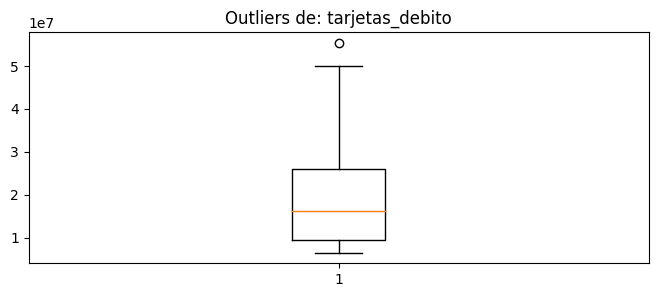

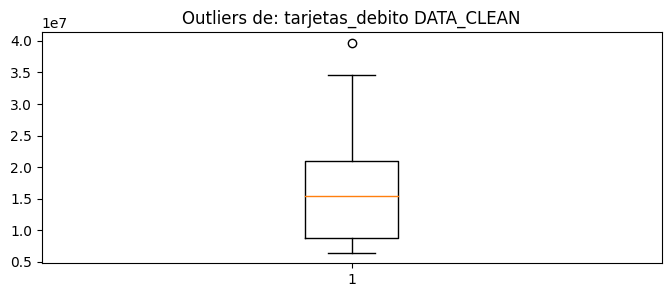

In [96]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["tarjetas_debito"]) 
plt.title("Outliers de: tarjetas_debito")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["tarjetas_debito"]) 
plt.title("Outliers de: tarjetas_debito DATA_CLEAN")
plt.show()

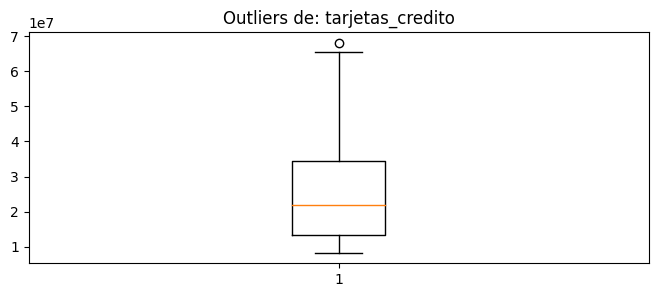

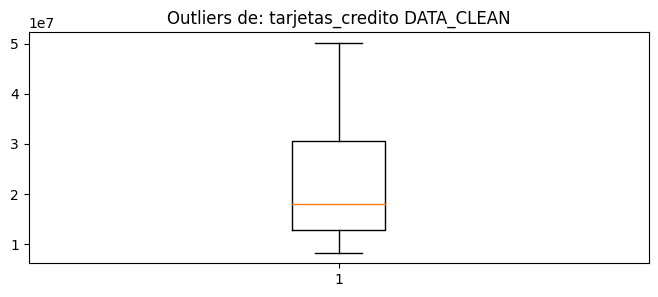

In [97]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["tarjetas_credito"]) 
plt.title("Outliers de: tarjetas_credito")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["tarjetas_credito"]) 
plt.title("Outliers de: tarjetas_credito DATA_CLEAN")
plt.show()

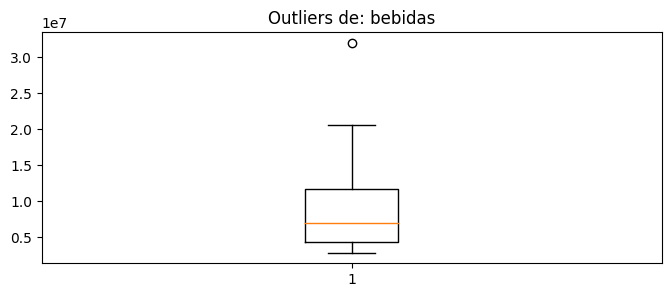

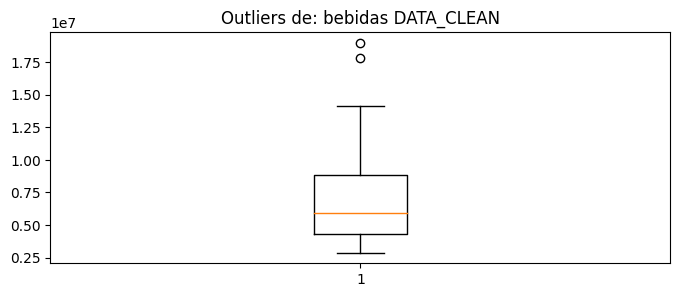

In [98]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["bebidas"]) 
plt.title("Outliers de: bebidas")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["bebidas"]) 
plt.title("Outliers de: bebidas DATA_CLEAN")
plt.show()

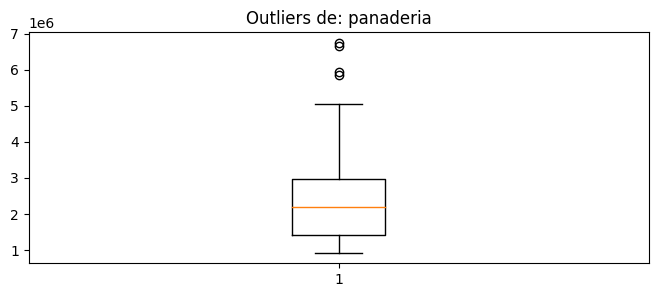

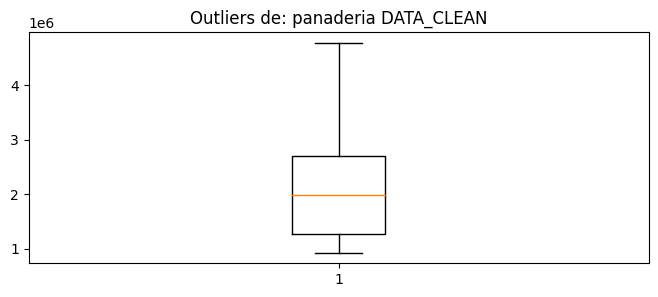

In [99]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["panaderia"]) 
plt.title("Outliers de: panaderia")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["panaderia"]) 
plt.title("Outliers de: panaderia DATA_CLEAN")
plt.show()

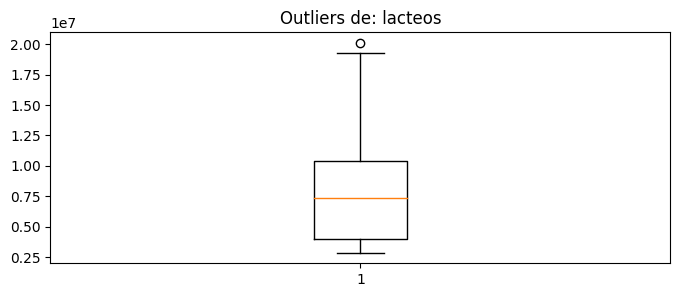

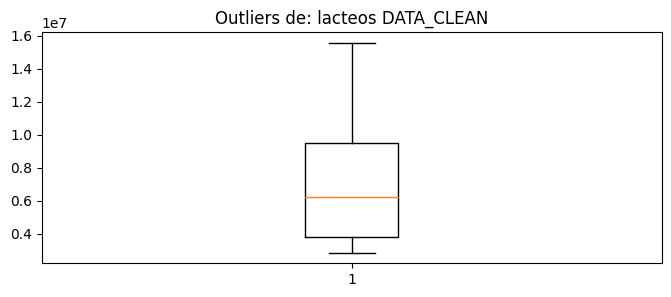

In [100]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["lacteos"]) 
plt.title("Outliers de: lacteos")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["lacteos"]) 
plt.title("Outliers de: lacteos DATA_CLEAN")
plt.show()

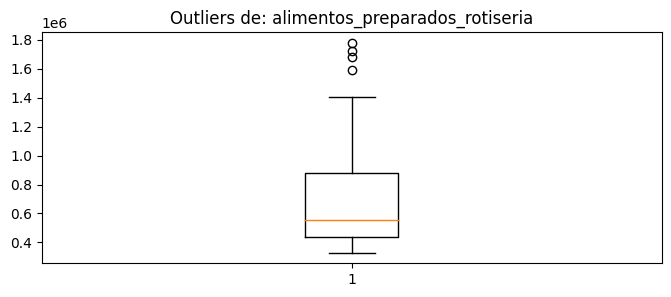

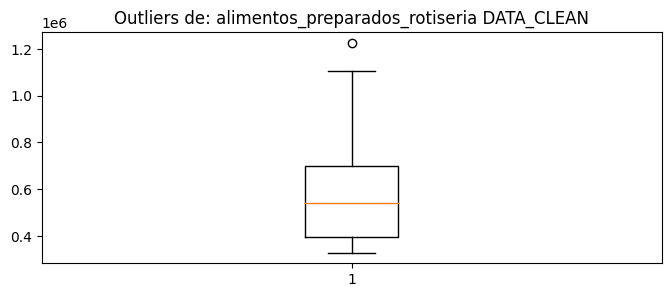

In [101]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de: alimentos_preparados_rotiseria")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de: alimentos_preparados_rotiseria DATA_CLEAN")
plt.show()

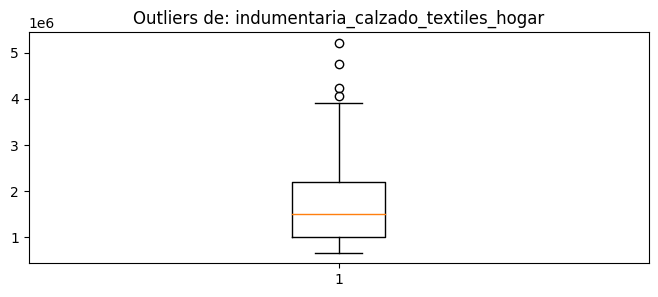

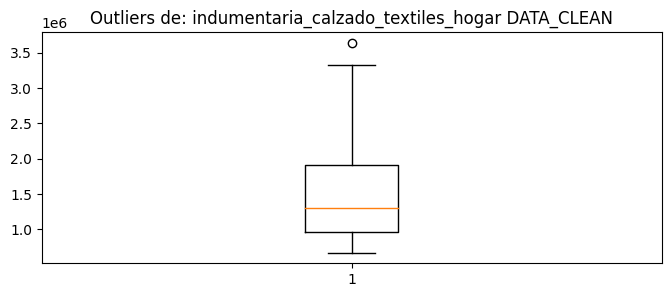

In [102]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de: indumentaria_calzado_textiles_hogar")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de: indumentaria_calzado_textiles_hogar DATA_CLEAN")
plt.show()

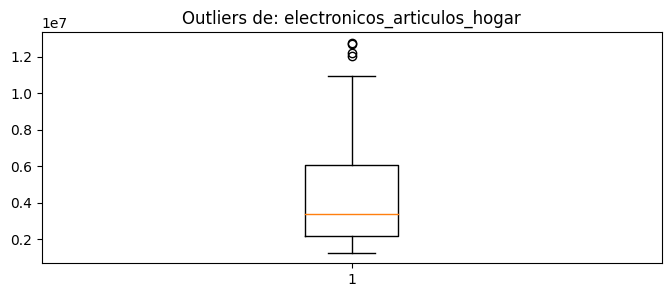

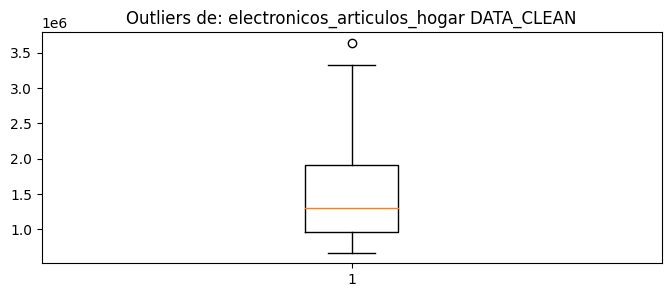

In [104]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["electronicos_articulos_hogar"]) 
plt.title("Outliers de: electronicos_articulos_hogar")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de: electronicos_articulos_hogar DATA_CLEAN")
plt.show()

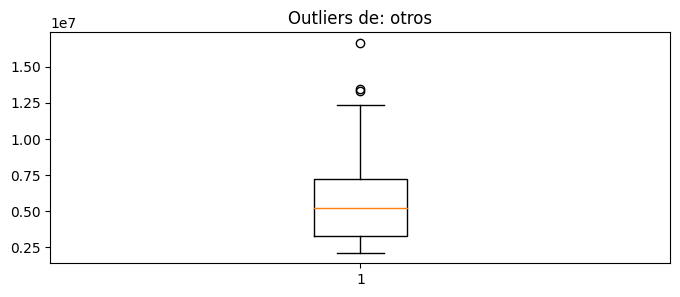

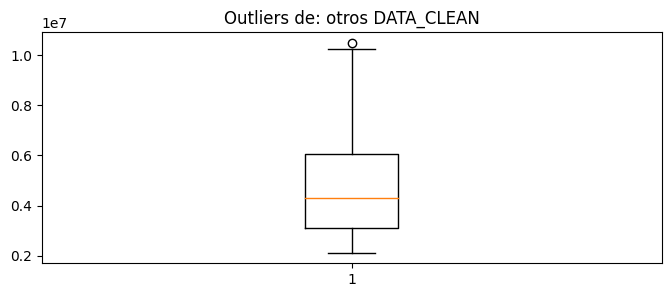

In [105]:
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data["otros"]) 
plt.title("Outliers de: otros")
plt.show()
print("\n")
fig = plt.figure(figsize =(8, 3))
plt.boxplot(data_clean_iqr["otros"]) 
plt.title("Outliers de: otros DATA_CLEAN")
plt.show()

#**Exportar Datos**

In [ ]:
# Cálculo de límites y limpieza de DF
resultados_iqr = pd.DataFrame(columns=['Superior', 'Inferior'], index=data.columns)
for columna in data:
  percentile25 = data[columna].quantile(0.25) #Q1
  percentile75 = data[columna].quantile(0.75) #Q3
  iqr = percentile75 - percentile25
  LimiteUpper_iqr = percentile75 + 1.5*iqr
  LimiteLower_iqr = percentile25 - 1.5*iqr
  resultados_iqr.loc[columna] = [LimiteUpper_iqr, LimiteLower_iqr]
data_clean_iqr = data.copy()
for columna in data_clean_iqr:
  data_clean_iqr = data_clean_iqr[(data_clean_iqr[columna] <= resultados_iqr.loc[columna]['Superior']) & (data_clean_iqr[columna] >= resultados.loc[columna]['Inferior'])]

# Identificación de los outliers
outliers_por_columna_iqr = {}
for columna in data:
  outliers_iqr = data[(data[columna] >= resultados_iqr.loc[columna]['Superior']) | (data[columna] <= resultados_iqr.loc[columna]['Inferior'])]
  if not outliers_iqr.empty:
    outliers_por_columna_iqr[columna] = outliers_iqr
if outliers_por_columna_iqr:
  print("Columnas con outliers:")
  for columna in outliers_por_columna_iqr.keys():
    print(columna)

Columnas con outliers:
ventas_precios_corrientes
ventas_precios_constantes
tarjetas_debito
tarjetas_credito
bebidas
panaderia
lacteos
alimentos_preparados_rotiseria
indumentaria_calzado_textiles_hogar
electronicos_articulos_hogar
otros


In [ ]:
# Automáticamente se genera un DF por cada columna. Para visualizar los outliers, solo se tiene que imprimir el nombre del diccionaro y la columna de interés.
outliers_por_columna_iqr["lacteos"]

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,68070088.23,8944251.942,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [113]:
#Convertir DataFrame a CSV
outliers_por_columna["ventas_precios_constantes"].to_csv("STD ventas_precios_constantes.csv")
outliers_por_columna["bebidas"].to_csv("STD bebidas.csv")
outliers_por_columna["indumentaria_calzado_textiles_hogar"].to_csv("STD indumentaria_calzado_textiles_hogar.csv")
outliers_por_columna["otros"].to_csv("STD otros.csv")

outliers_por_columna_iqr["ventas_precios_corrientes"].to_csv("IQR ventas_precios_corrientes.csv")
outliers_por_columna_iqr["ventas_precios_constantes"].to_csv("IQR ventas_precios_constantes.csv")
outliers_por_columna_iqr["tarjetas_debito"].to_csv("IQR tarjetas_debito.csv")
outliers_por_columna_iqr["tarjetas_credito"].to_csv("IQR tarjetas_credito.csv")
outliers_por_columna_iqr["bebidas"].to_csv("IQR bebidas.csv")
outliers_por_columna_iqr["panaderia"].to_csv("IQR panaderia.csv")
outliers_por_columna_iqr["lacteos"].to_csv("IQR lacteos.csv")
outliers_por_columna_iqr["alimentos_preparados_rotiseria"].to_csv("IQR alimentos_preparados_rotiseria.csv")
outliers_por_columna_iqr["indumentaria_calzado_textiles_hogar"].to_csv("IQR indumentaria_calzado_textiles_hogar.csv")
outliers_por_columna_iqr["electronicos_articulos_hogar"].to_csv("IQR electronicos_articulos_hogar.csv")
outliers_por_columna_iqr["otros"].to_csv("IQR otros.csv")



In [116]:
#descargar archivo filtrado en csv
from google.colab import files 
  

files.download("STD ventas_precios_constantes.csv")
files.download("STD bebidas.csv")
files.download("STD indumentaria_calzado_textiles_hogar.csv")
files.download("STD otros.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
files.download("IQR ventas_precios_corrientes.csv")
files.download("IQR ventas_precios_constantes.csv")
files.download("IQR tarjetas_debito.csv")
files.download("IQR tarjetas_credito.csv")
files.download("IQR bebidas.csv")
files.download("IQR panaderia.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
files.download("IQR lacteos.csv")
files.download("IQR alimentos_preparados_rotiseria.csv")
files.download("IQR indumentaria_calzado_textiles_hogar.csv")
files.download("IQR electronicos_articulos_hogar.csv")
files.download("IQR otros.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>